#### Import of Libraries

In [169]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pca import pca
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pycaret as pc

sns.set_theme(style="darkgrid")
plt.rcParams['figure.figsize'] = (7,5)

#### Dataset

In [170]:
df = pd.read_csv('datasets/healthcare-dataset-stroke-data.csv')
df = df.drop(columns=['smoking_status'])
df = df.drop(columns=['id'])
df = df.drop(columns=['bmi'])
#df = df.drop_duplicates(keep = False, inplace = True)

# gender: 0 for female and 1 for male, 3 for Other
df["gender"]=df["gender"].replace("Female",1)  
df["gender"]=df["gender"].replace("Male",2)
df["gender"]=df["gender"].replace("Other",3)

# Residence_type: 0 for females and 1 for males
df["Residence_type"]=df["Residence_type"].replace("Urban",0)  
df["Residence_type"]=df["Residence_type"].replace("Rural",1)

# ever_married: 0 for No, 1 for Yes
df["ever_married"]=df["ever_married"].replace("No",0)  
df["ever_married"]=df["ever_married"].replace("Yes",1)

# work_type: 1 for Private, 2 for Self-employed, 3 for children, 4 for Govt_job, 5 for Never_worked
df["work_type"]=df["work_type"].replace("Private",1)
df["work_type"]=df["work_type"].replace("Self-employed",2)
df["work_type"]=df["work_type"].replace("children",3)
df["work_type"]=df["work_type"].replace("Govt_job",4)
df["work_type"]=df["work_type"].replace("Never_worked",5)


In [171]:
df.head(25)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,stroke
0,2,67.0,0,1,1,1,0,228.69,1
1,1,61.0,0,0,1,2,1,202.21,1
2,2,80.0,0,1,1,1,1,105.92,1
3,1,49.0,0,0,1,1,0,171.23,1
4,1,79.0,1,0,1,2,1,174.12,1
5,2,81.0,0,0,1,1,0,186.21,1
6,2,74.0,1,1,1,1,1,70.09,1
7,1,69.0,0,0,0,1,0,94.39,1
8,1,59.0,0,0,1,1,1,76.15,1
9,1,78.0,0,0,1,1,0,58.57,1


In [172]:
df.info()
print("Number of duplicated rows is: ", df.duplicated().sum())
print("Number of rows with NaNs is: ", df.isna().any(axis=1).sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   int64  
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   int64  
 5   work_type          5110 non-null   int64  
 6   Residence_type     5110 non-null   int64  
 7   avg_glucose_level  5110 non-null   float64
 8   stroke             5110 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 359.4 KB
Number of duplicated rows is:  5
Number of rows with NaNs is:  0


#### Exploratory Data Analysis

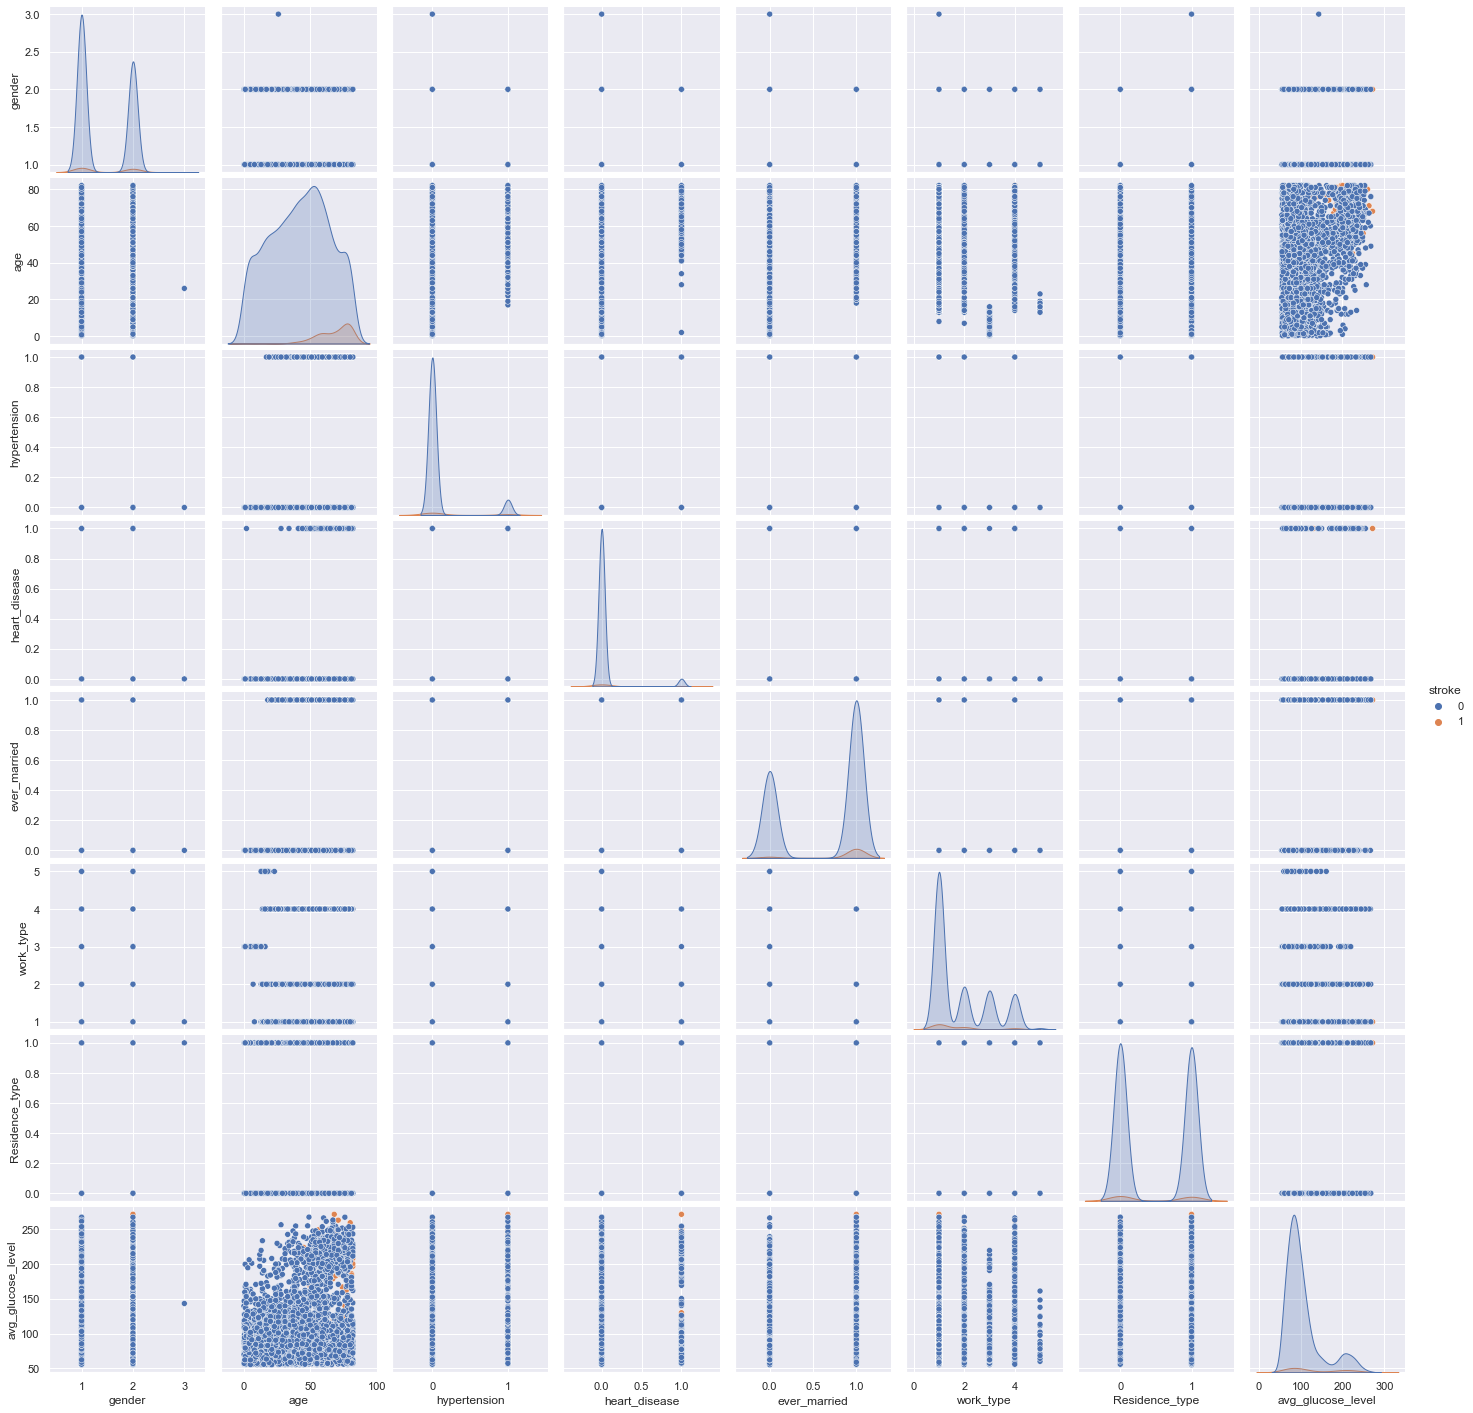

In [173]:
sns.pairplot(df, hue='stroke')
plt.show()

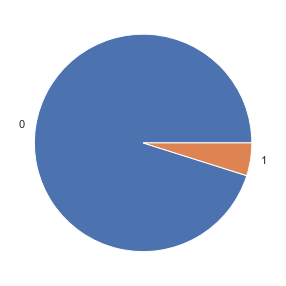

In [174]:
y =df['stroke']
y.value_counts().plot(kind='pie')
plt.ylabel('')
plt.show()

#### Data Matrix

In [175]:
X = df.drop(columns=['stroke'])
X.head(25)
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
gender,5110.0,1.414286,0.493044,1.00,1.000,1.000,2.00,3.00
age,5110.0,43.226614,22.612647,0.08,25.000,45.000,61.00,82.00
hypertension,5110.0,0.097456,0.296607,0.00,0.000,0.000,0.00,1.00
heart_disease,5110.0,0.054012,0.226063,0.00,0.000,0.000,0.00,1.00
ever_married,5110.0,0.656164,0.475034,0.00,0.000,1.000,1.00,1.00
work_type,5110.0,1.832094,1.109924,1.00,1.000,1.000,3.00,5.00
Residence_type,5110.0,0.491977,0.499985,0.00,0.000,0.000,1.00,1.00
avg_glucose_level,5110.0,106.147677,45.283560,55.12,77.245,91.885,114.09,271.74


#### Standardize the Data

In [176]:
Xs = StandardScaler().fit_transform(X)
Xcols = X.columns
X = pd.DataFrame(Xs)
X.columns = Xcols
X.head(25)
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
gender,5110.0,-1.195825e-16,1.000098,-0.840344,-0.840344,-0.840344,1.188073,3.216489
age,5110.0,5.005781e-17,1.000098,-1.908261,-0.806115,0.078432,0.786070,1.714845
hypertension,5110.0,-4.727682e-17,1.000098,-0.328602,-0.328602,-0.328602,-0.328602,3.043196
heart_disease,5110.0,5.561978e-18,1.000098,-0.238947,-0.238947,-0.238947,-0.238947,4.185032
ever_married,5110.0,-6.118176e-17,1.000098,-1.381436,-1.381436,0.723884,0.723884,0.723884
work_type,5110.0,8.342968e-18,1.000098,-0.749759,-0.749759,-0.749759,1.052343,2.854444
Residence_type,5110.0,-9.733462e-18,1.000098,-0.984080,-0.984080,-0.984080,1.016178,1.016178
avg_glucose_level,5110.0,1.001156e-16,1.000098,-1.126958,-0.638322,-0.314995,0.175408,3.657145


#### Observations and Variables

In [177]:
observations = list(df.index)
variables = list(df.columns)

#### Box and Whisker Plots

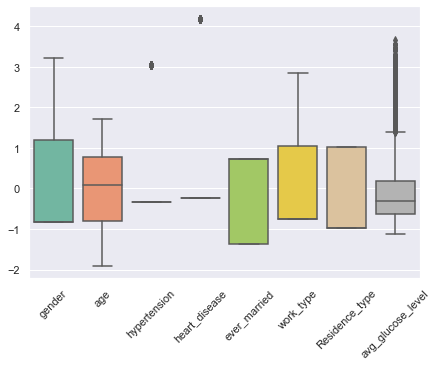

In [178]:
ax = plt.figure()
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

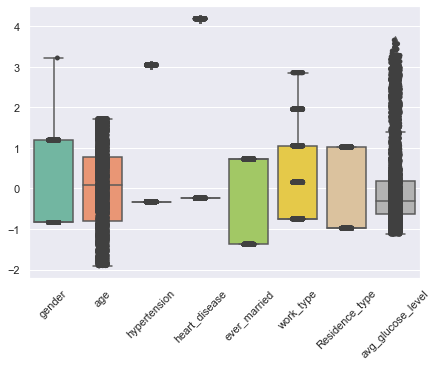

In [179]:
# Use swarmplot() or stripplot to show the datapoints on top of the boxes:
#plt. figure()
ax = plt.figure()    
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax = sns.stripplot(data=X, color=".25") 
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

#### Correlation Matrix

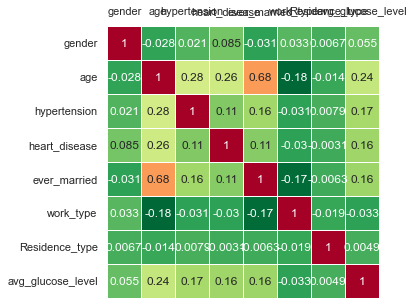

In [180]:
ax = sns.heatmap(X.corr(), cmap='RdYlGn_r', linewidths=0.5, annot=True, cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0);

#### PCA

In [181]:
model = pca()
# Fit transform
out = model.fit_transform(X)

[pca] >Processing dataframe..
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [8] columns of the input data.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Computing explained variance..
[pca] >Number of components is [7] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [8] columns of the input dataframe.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[7]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


PCs

In [182]:
out['PC']

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,3.181691,2.752959,0.751749,-1.704107,2.202546,1.790409,-0.365351
1,1.319457,-0.116971,-0.830030,1.073523,0.400496,0.635444,-1.845095
2,2.663476,1.694291,-1.122173,-1.918041,2.671146,-0.043582,1.313257
3,0.984817,-0.704939,0.888424,0.037194,-0.041948,1.151357,-1.168522
4,2.702895,0.273910,-0.783820,2.495759,-1.275904,0.415213,0.471388
...,...,...,...,...,...,...,...
5105,2.301256,-0.877614,0.976302,1.170036,-1.583294,0.088849,1.970025
5106,1.325104,-0.892383,1.163730,0.317587,0.352892,-0.246951,-0.734755
5107,-0.209384,-0.948958,-0.845079,0.510135,0.509903,-0.487681,-0.080120
5108,1.010932,0.518191,-1.262236,-0.790854,-0.591704,0.155945,-1.288389


Scatter Plot

(<Figure size 1440x1080 with 1 Axes>,
 <AxesSubplot:title={'center':'7 Principal Components explain [99.99%] of the variance'}, xlabel='PC1 (25.9% expl.var)', ylabel='PC2 (14.2% expl.var)'>)

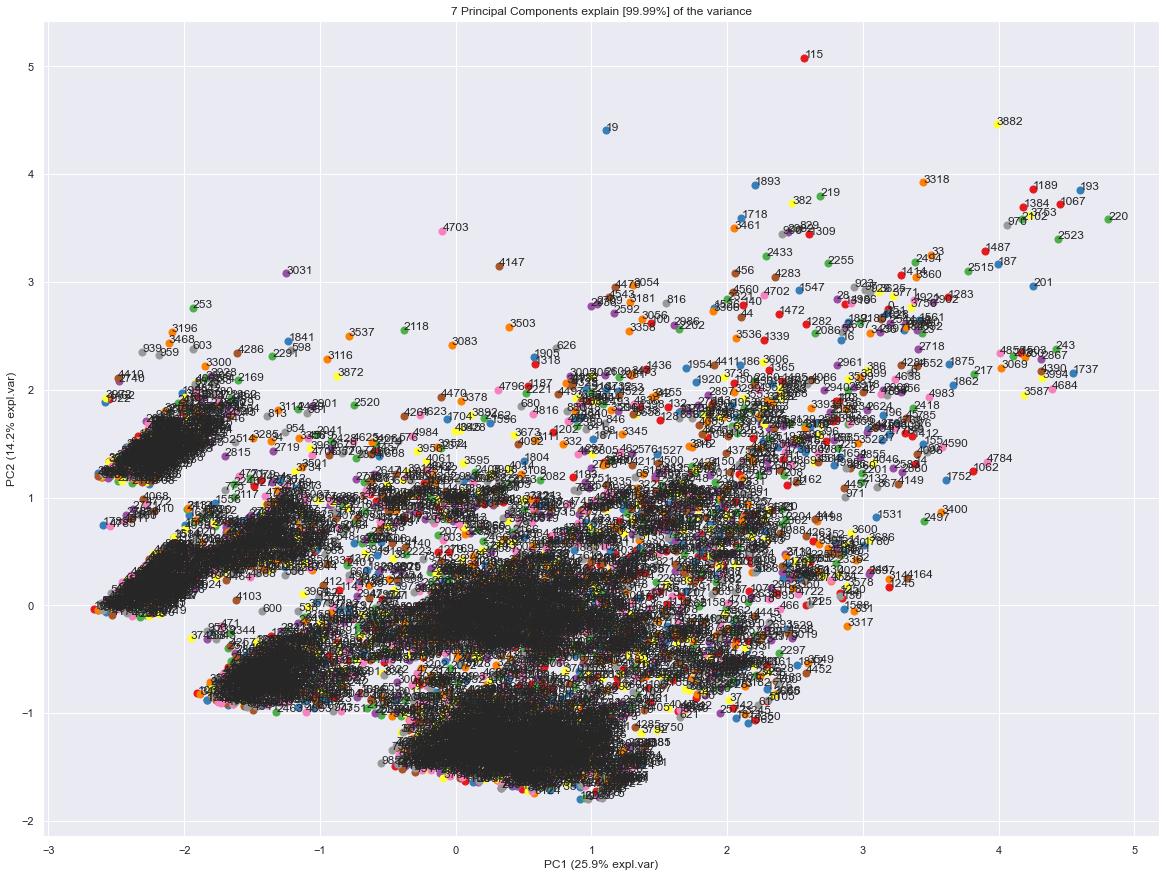

In [183]:
model.scatter(label=True, legend=False)

Eigenvectors

In [184]:
A = out['loadings'].T

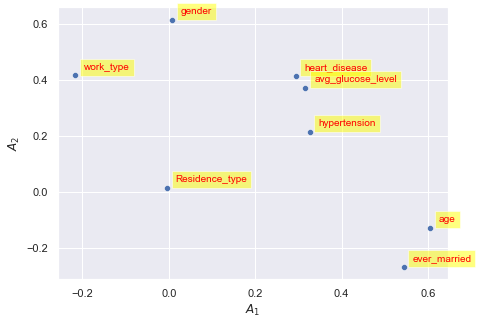

In [185]:
sns.scatterplot(data=A, x="PC1", y="PC2")
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for i in range(A.shape[0]):
 plt.text(x=A.PC1[i]+0.02,y=A.PC2[i]+0.02, s=variables[i],
          fontdict=dict(color='red',size=10),
          bbox=dict(facecolor='yellow',alpha=0.5))

#### Scree Plot

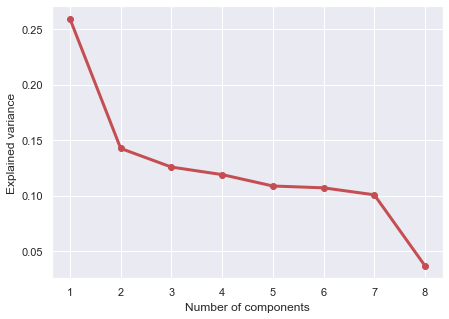

In [186]:
VR = out['variance_ratio']
x = np.arange(len(VR)) + 1
plt.plot(x, VR, 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance') 
plt.show()

#### Explained Variance

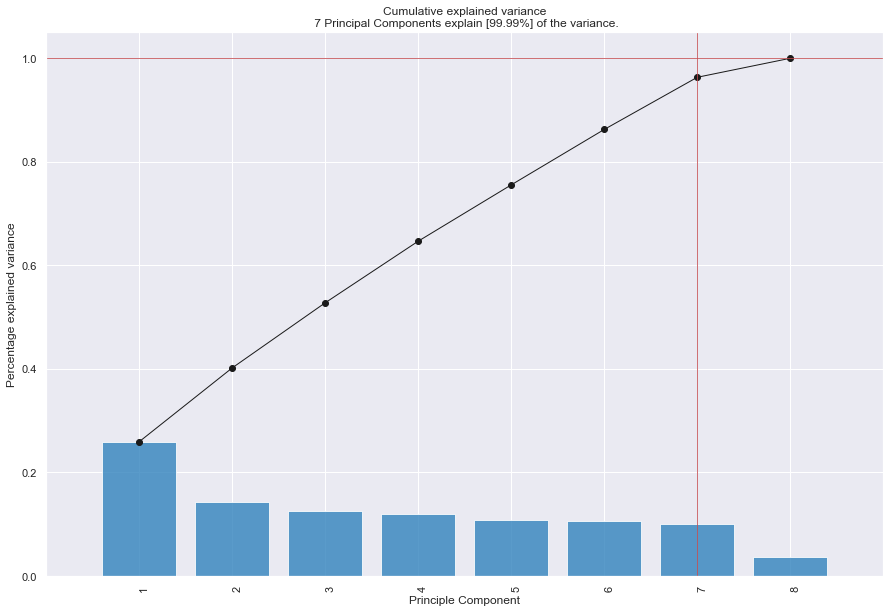

<Figure size 504x360 with 0 Axes>

In [187]:
model.plot();